# Udacity Capstone Project

## Kaggle Challenge: Allstate Claims Severity
Link: [Allstate Claims Severity Challenge](https://www.kaggle.com/c/allstate-claims-severity)

### How severe is an insurance claim?

When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why [Allstate](https://www.allstate.com/), a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.


Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

*Started:* 6:02 pm, Monday 10 October 2016 UTC

*Ends:* 11:59 pm, Monday 12 December 2016 UTC (63 total days)

## Infrastructure
- VSH: Amazon EC2
- Availability zone: us-east-1d
- Instance type: C3
- Application: Compute Optimized
- Model: c3.2xlarge
- vCPU: 8
- Mem (GiB): 15
- SSD Storage (GB): 2x80
- Operational system: Windows Server 2012 R2
- Platform: Anaconda2 64 bits
- Environment: Jupyter Notebook

### Features:
- High Frequency Intel Xeon E5-2680 v2 (Ivy Bridge) Processors
- Support for Enhanced Networking
- Support for clustering
- SSD-backed instance storage

## Coding

In [1]:
####################################
# Import libraries
####################################

# Warnings
import warnings
warnings.filterwarnings("ignore") 

# Basics
import pandas as pd
import numpy as np
from time import time

# Transform and scale
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler

# Cross validation
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

# Score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# Classifiers
from sklearn.tree import DecisionTreeRegressor
# from sklearn import linear_model
from sklearn import ensemble


In [3]:
####################################
# Load CSV
####################################
import pandas as pd
import numpy as np
from time import time

start = time()

train = pd.read_csv('Z:/data/allstate/train.csv', index_col='id')
test = pd.read_csv('Z:/data/allstate/test.csv', index_col='id')

end = time()
print "Load CSVs in {:.1f} seconds.\n".format(end - start)

Load CSVs in 4.5 seconds.



In [4]:
####################################
# Print Data Shape
####################################
print train.shape
print test.shape

(188318, 131)
(125546, 130)


In [5]:
####################################
# Print Columns
####################################
print list(train.columns)
print ""
print list(test.columns)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [6]:
####################################
# Define variables
####################################
loss = train['loss']
features = train.drop('loss', 1)
train_test = pd.concat((features, test))
numeric_features = list(train_test.dtypes[train_test.dtypes != "object"].index)
categorical_features = list(features.drop(numeric_features, 1))

In [7]:
####################################
# Describe Data
####################################
print "Train_Test Data Set Describe"
print train_test.describe()
print "\nLoss Describe"
print loss.describe()

Train_Test Data Set Describe
               cont1          cont2          cont3          cont4  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.494096       0.507089       0.498653       0.492021   
std         0.187768       0.207056       0.201961       0.211101   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.347403       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.625272       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.956046   

               cont5          cont6          cont7          cont8  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.487513       0.491442       0.485360       0.486823   
std         0.209063       0.205394       0.178531       0.199442   
min         0.281143       0.012683       0.069503       0.236880   
25% 

In [8]:
####################################
# Print Skew
####################################
from scipy.stats import skew

print "Train_Test Data Set Skew"
print train_test.skew()
print "\nLoss Skew"
print loss.skew()

Train_Test Data Set Skew
cont1     0.513207
cont2    -0.311147
cont3    -0.007023
cont4     0.417561
cont5     0.679614
cont6     0.458415
cont7     0.825893
cont8     0.673240
cont9     1.067252
cont10    0.352118
cont11    0.281141
cont12    0.291998
cont13    0.376140
cont14    0.250674
dtype: float64

Loss Skew
3.79495837754


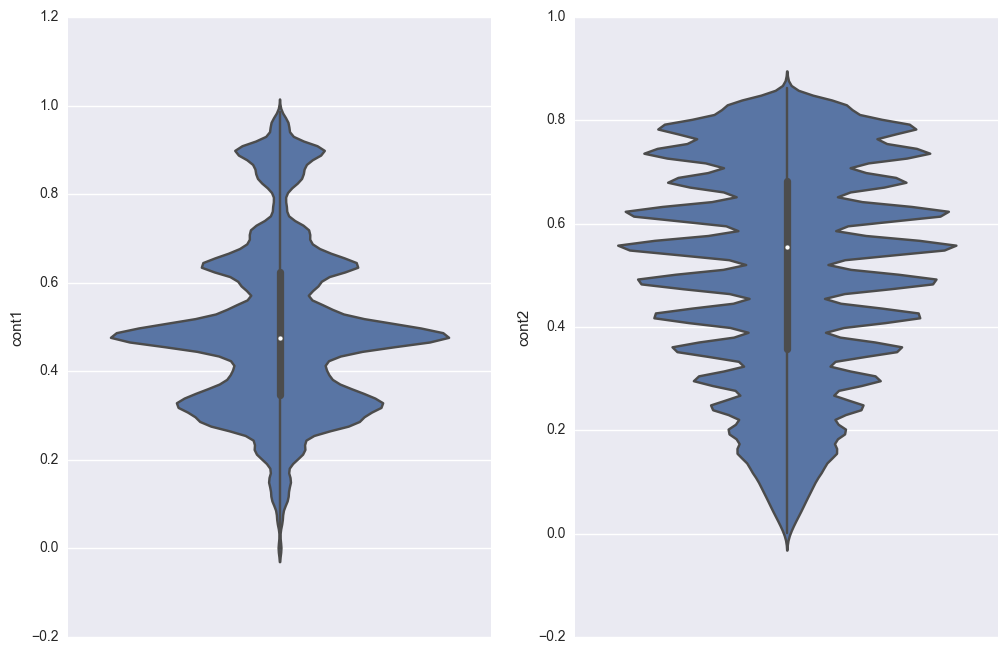

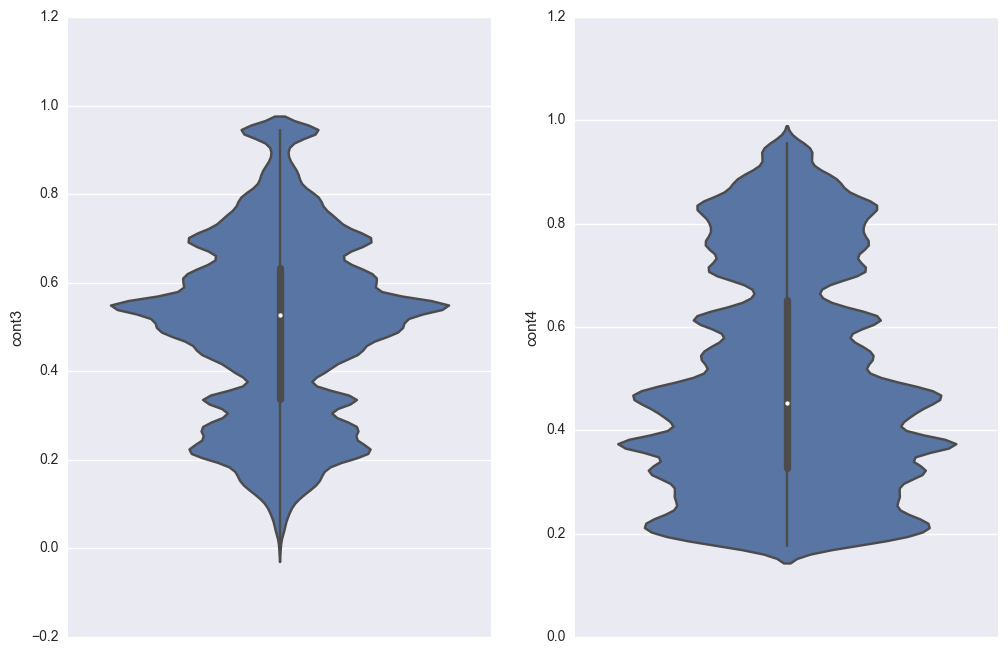

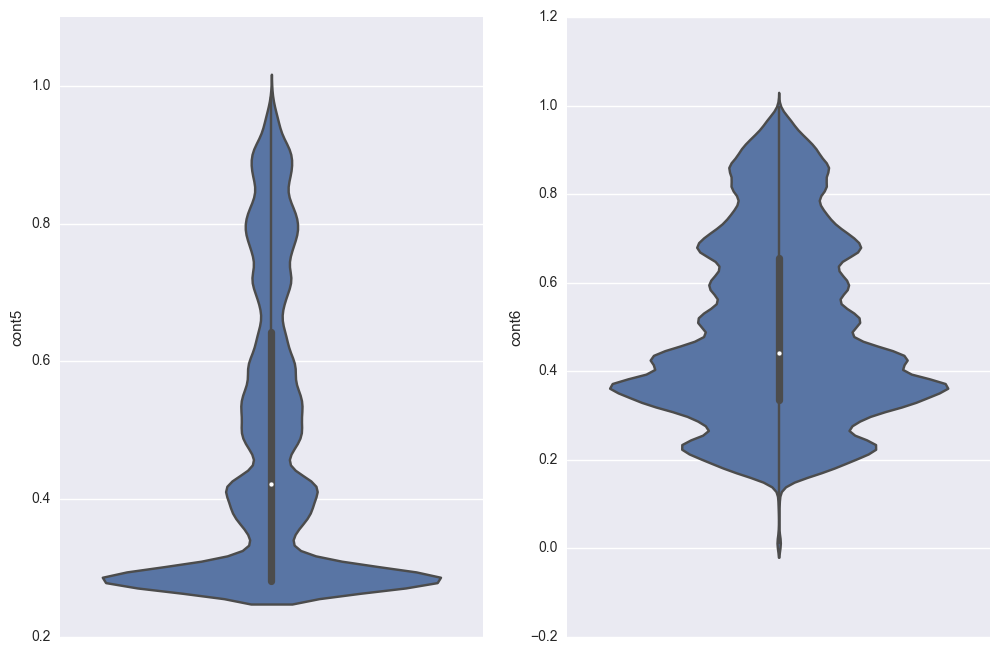

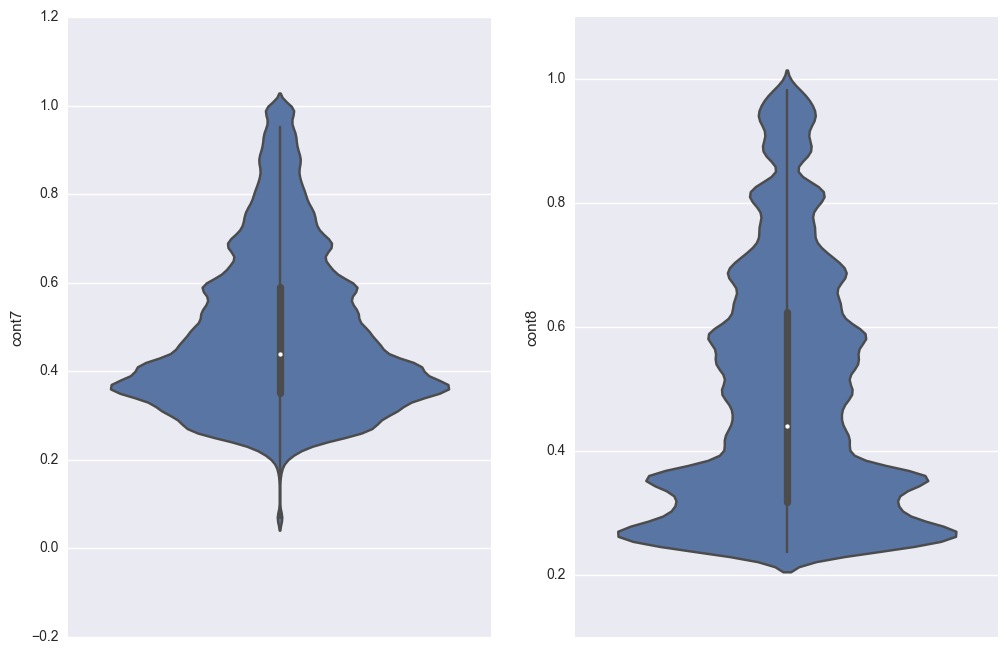

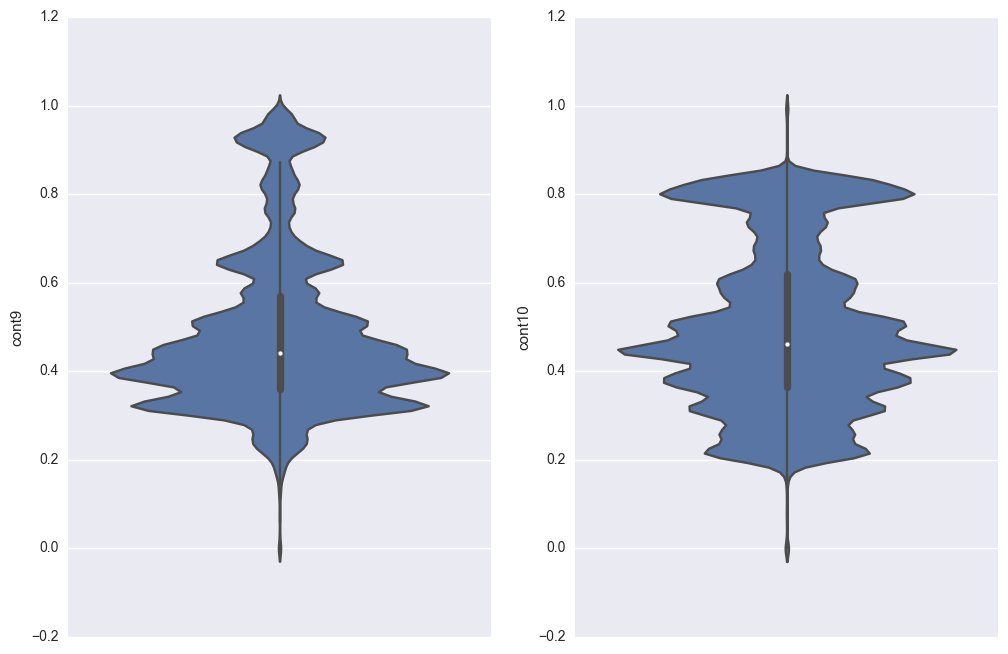

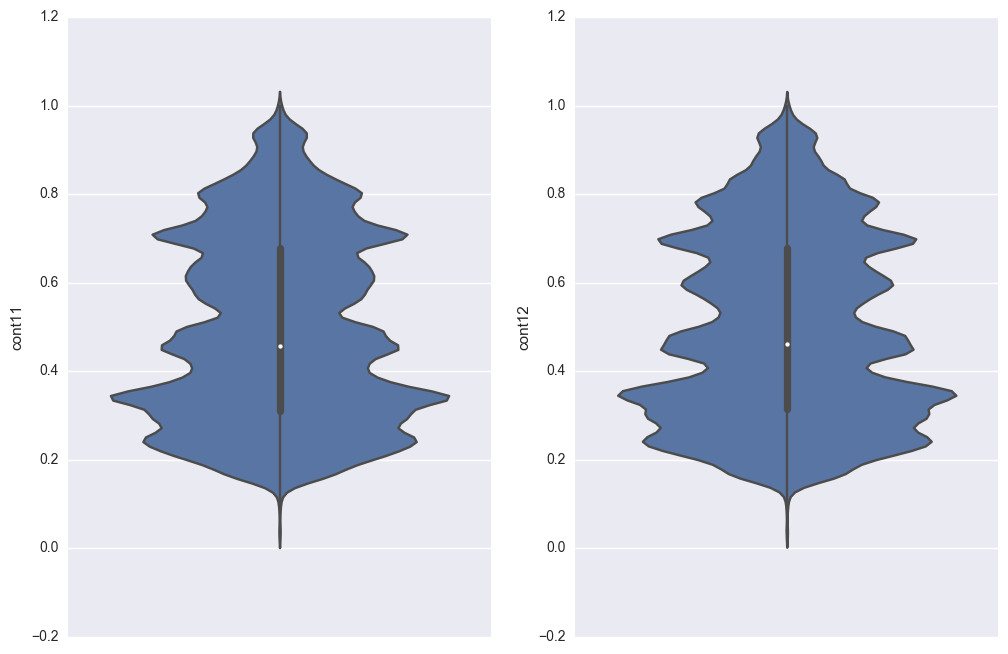

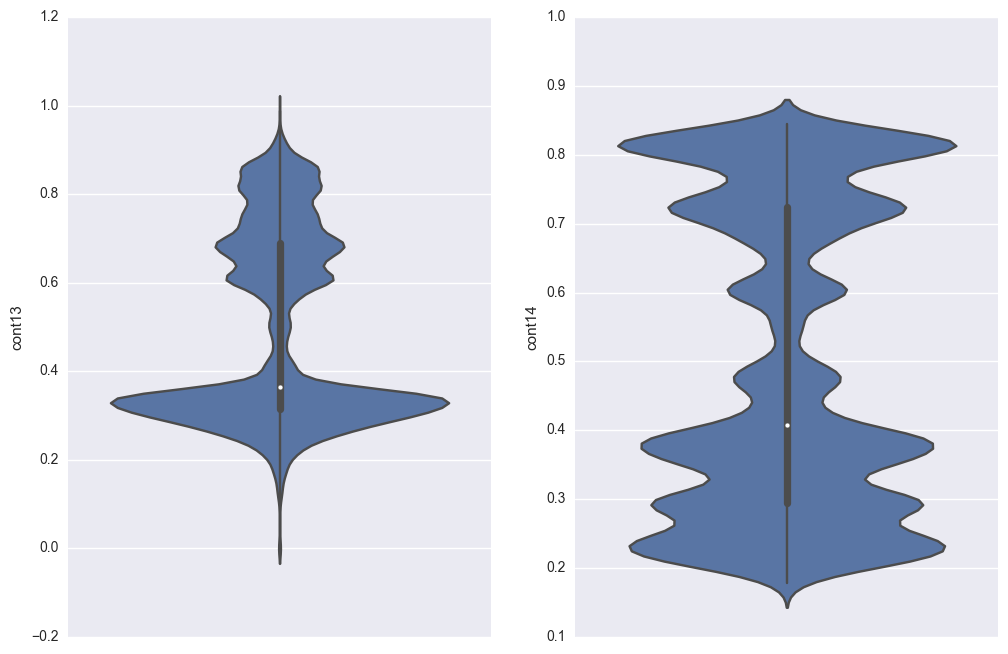

In [9]:
####################################
# Numerical Features Visualization
####################################

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create a dataframe with only numerical features
data = train_test[numeric_features] 

# Get the names of the columns
cols=data.columns 

# Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=data, ax=ax[j])

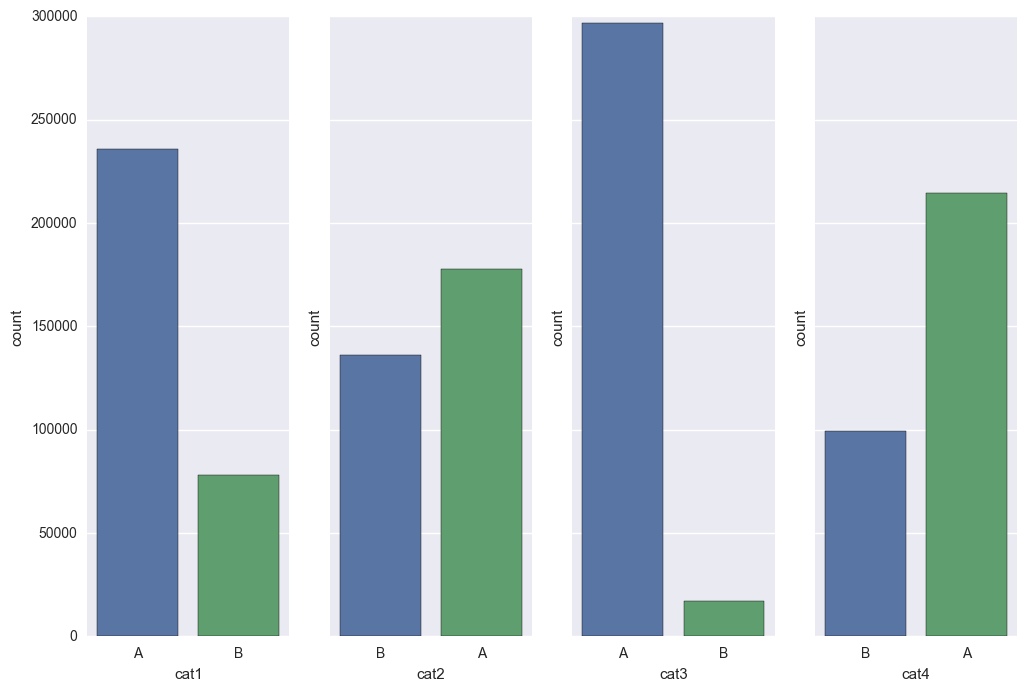

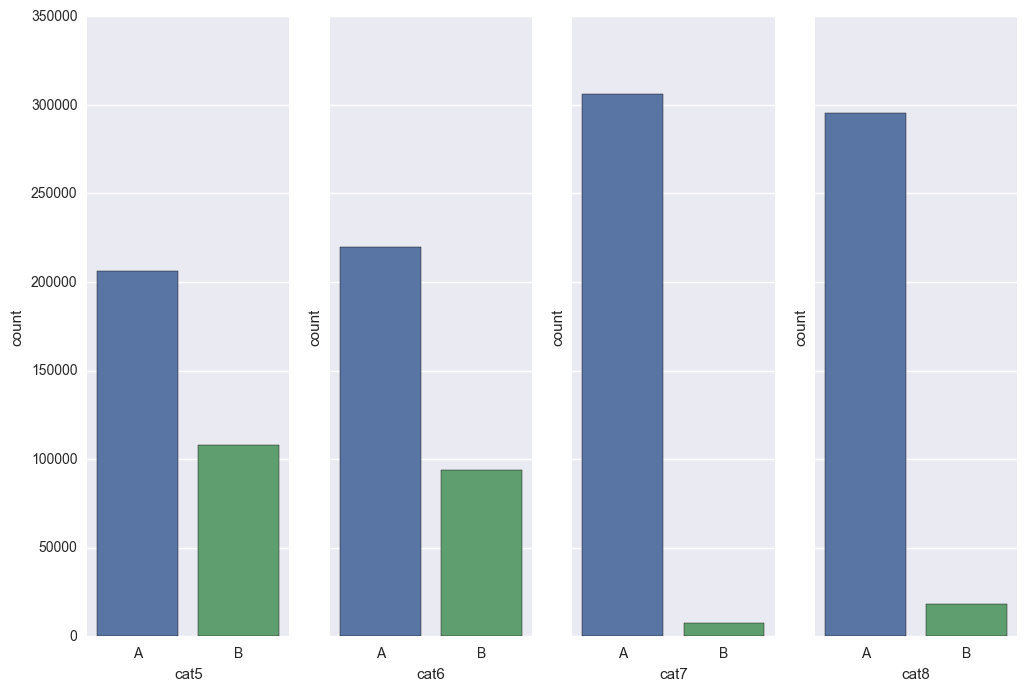

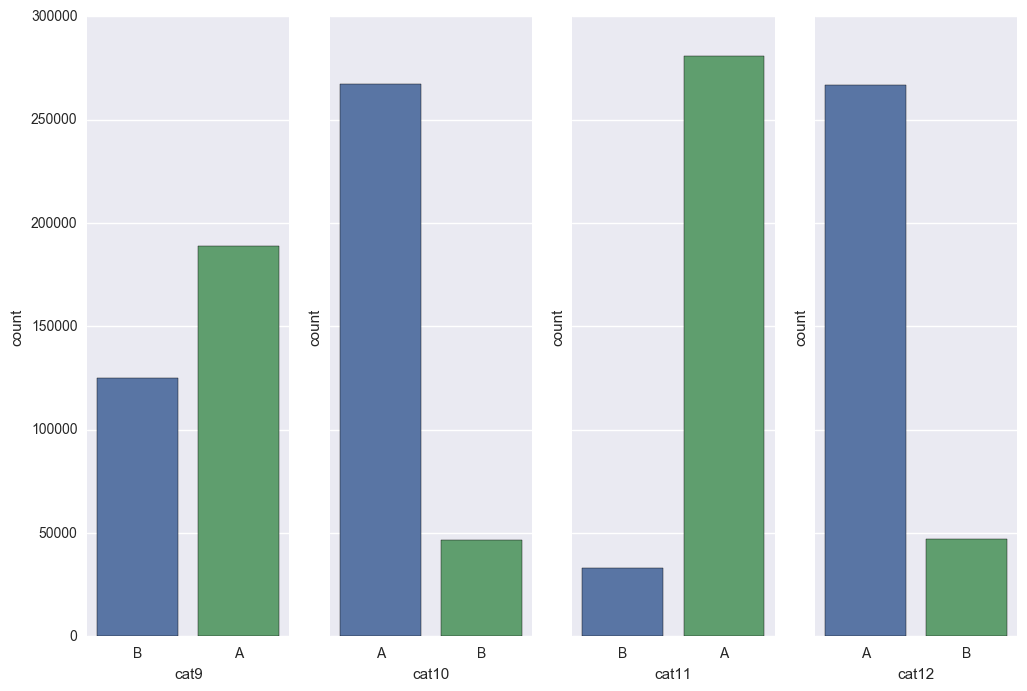

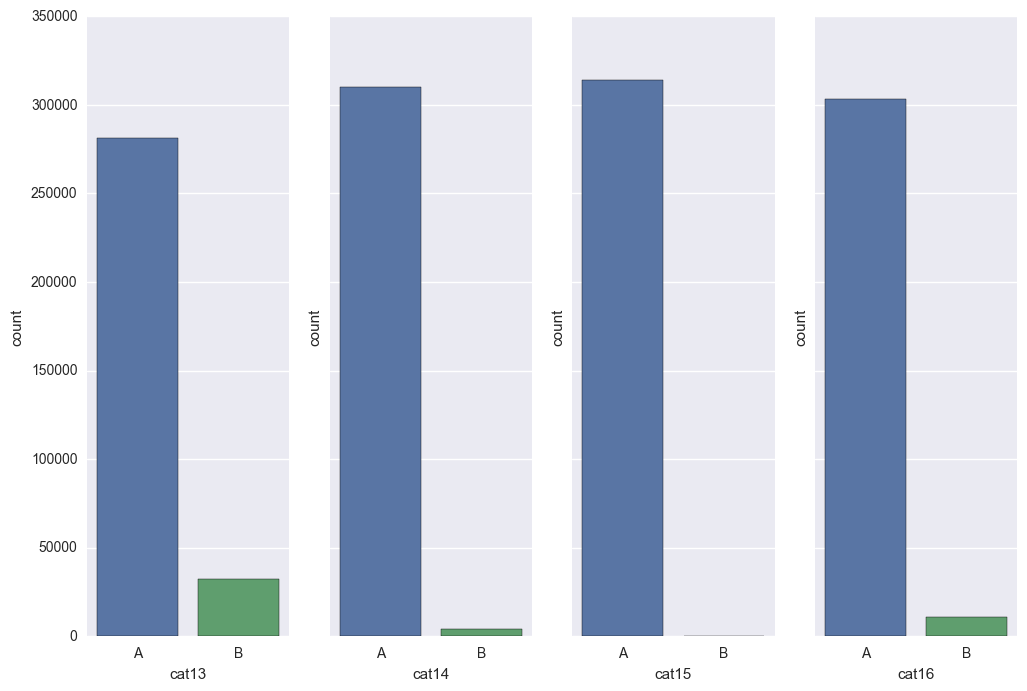

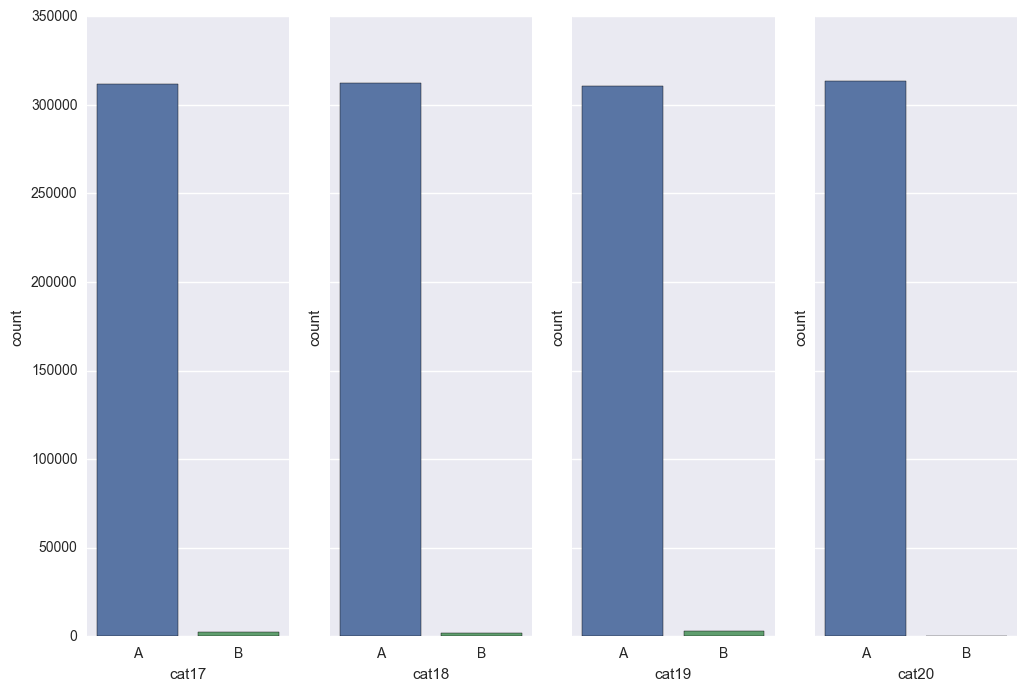

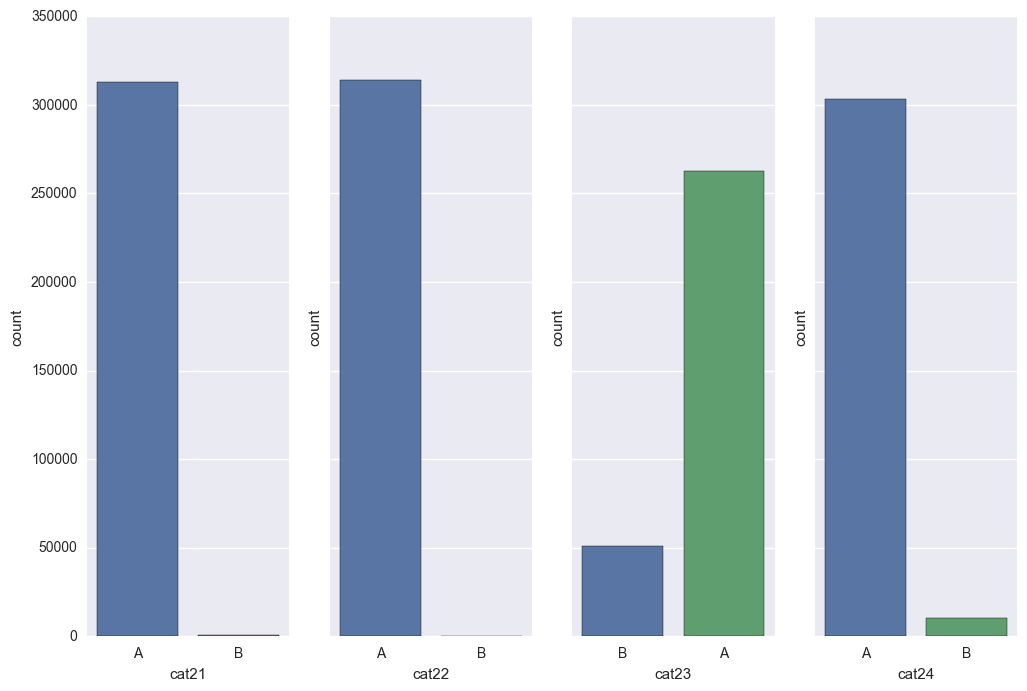

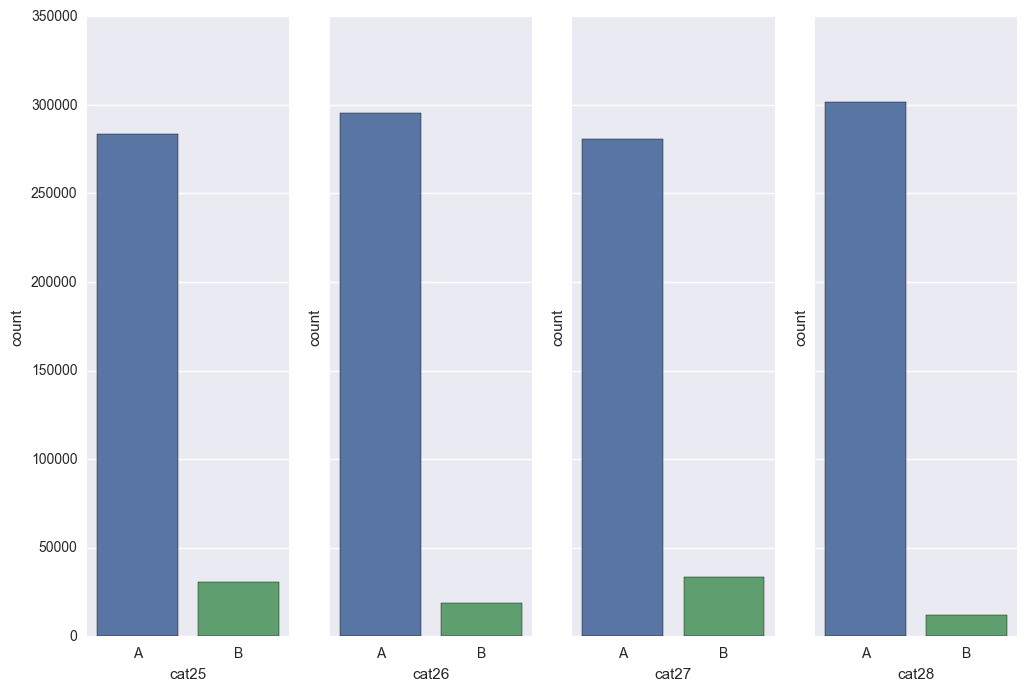

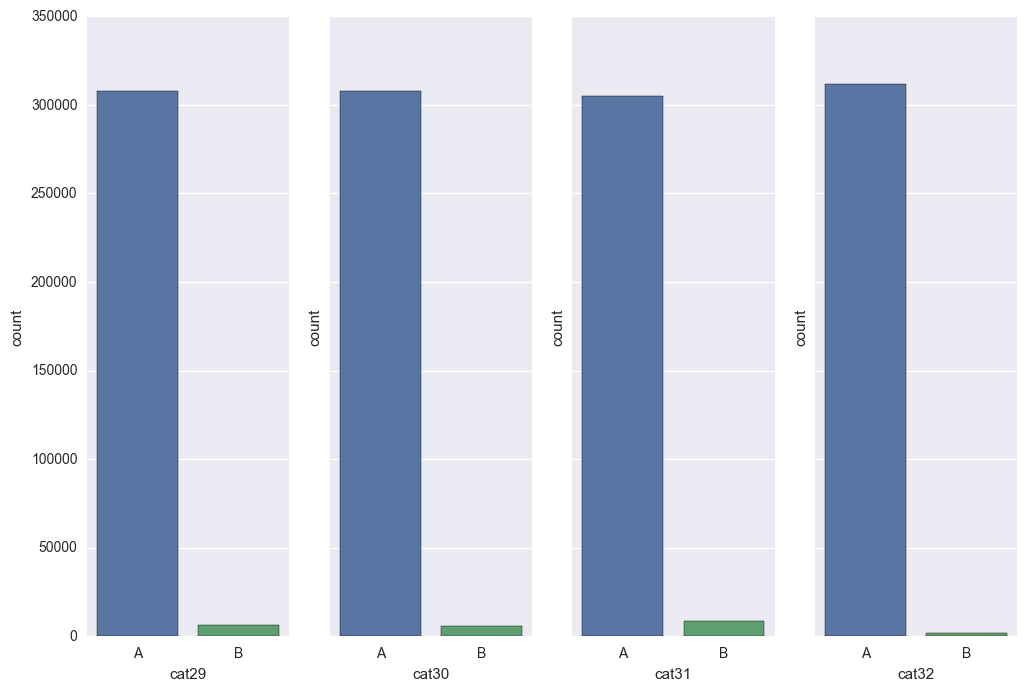

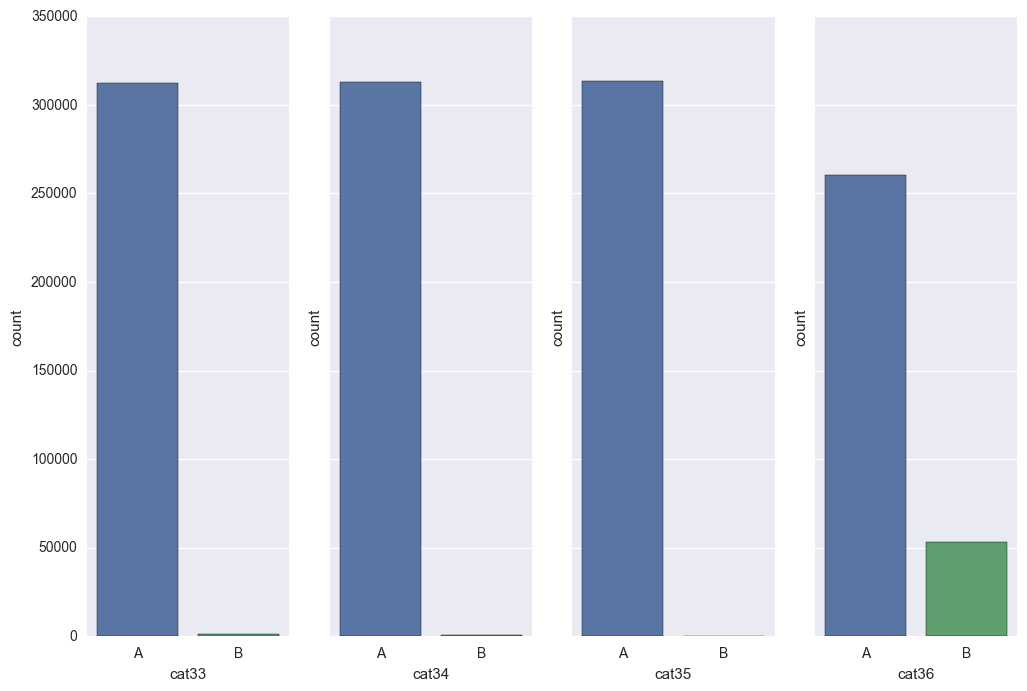

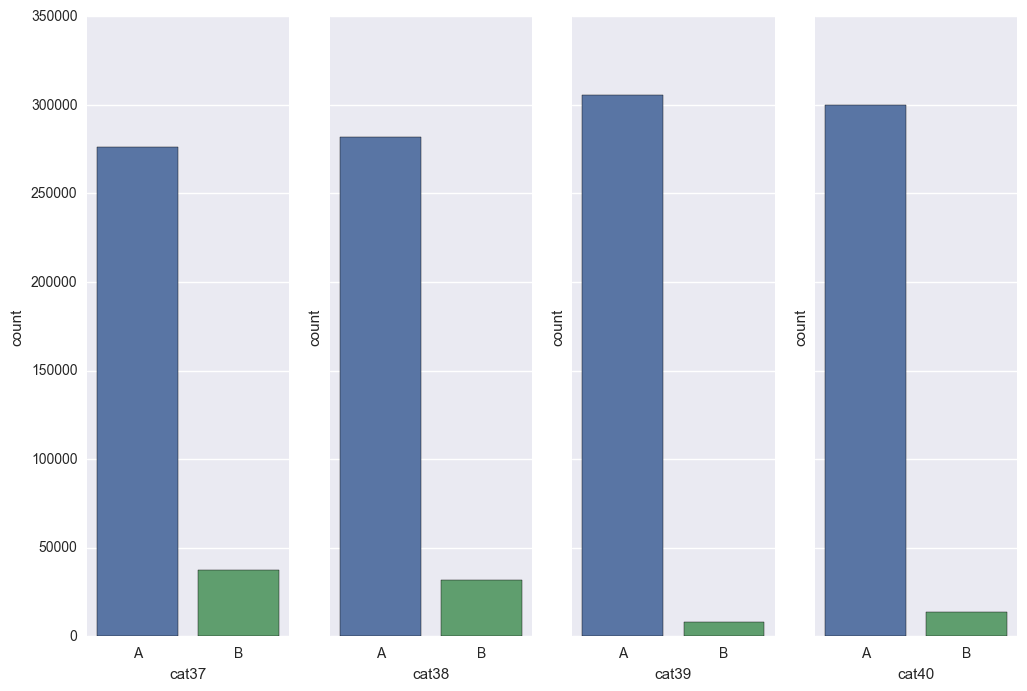

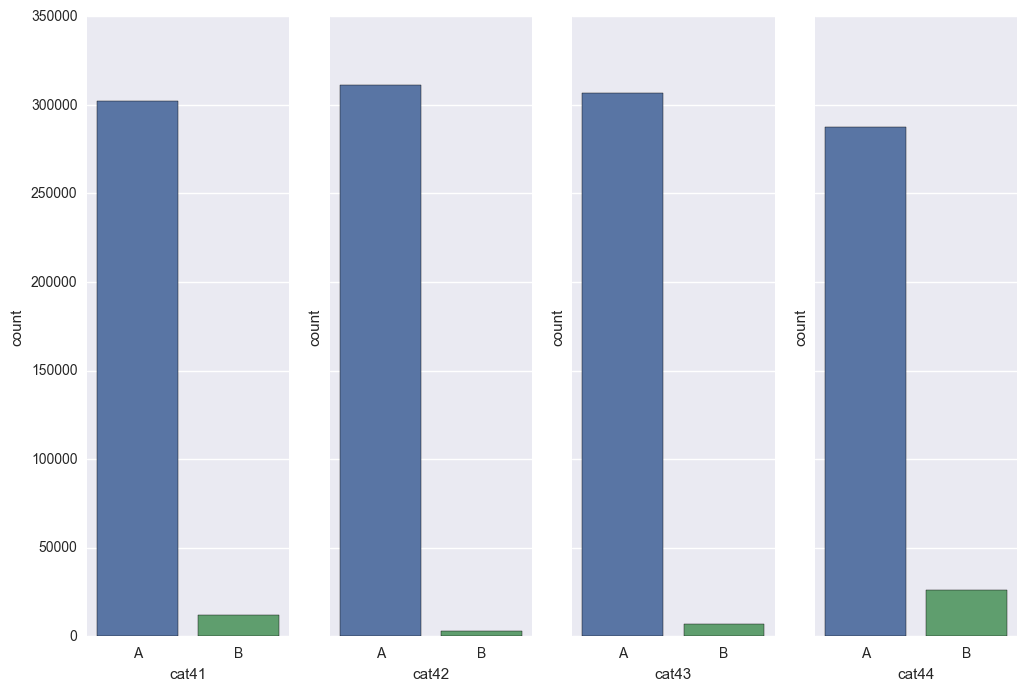

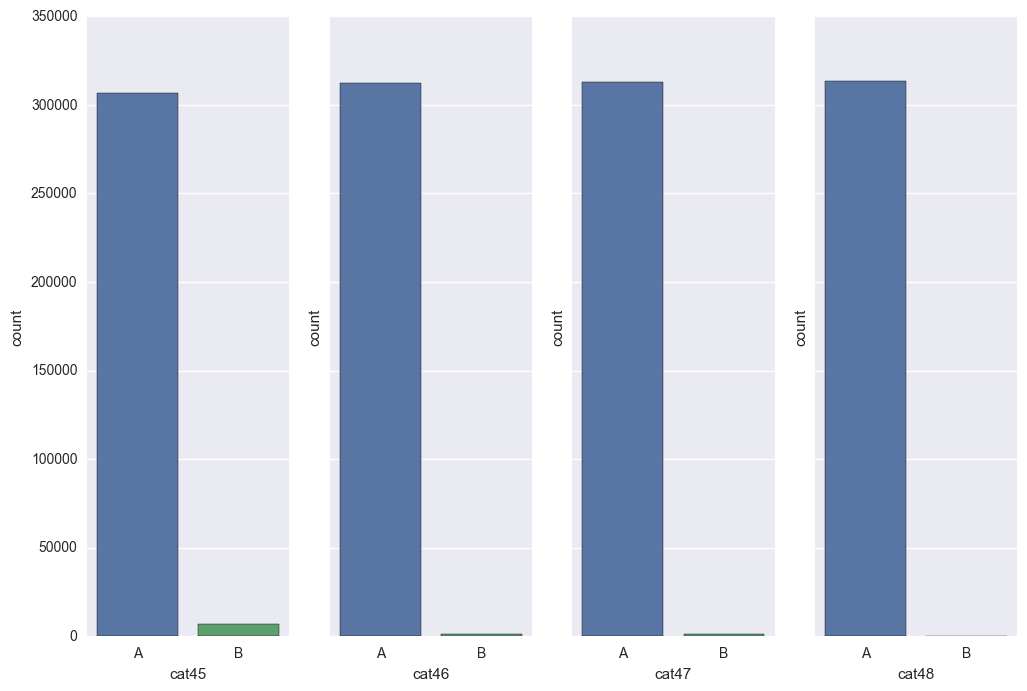

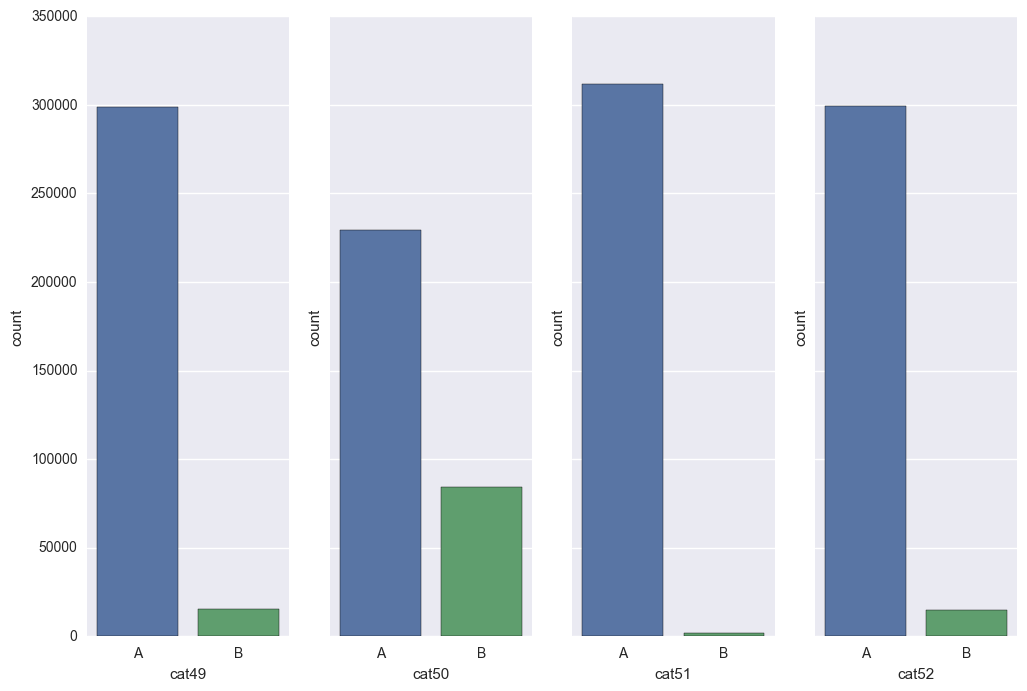

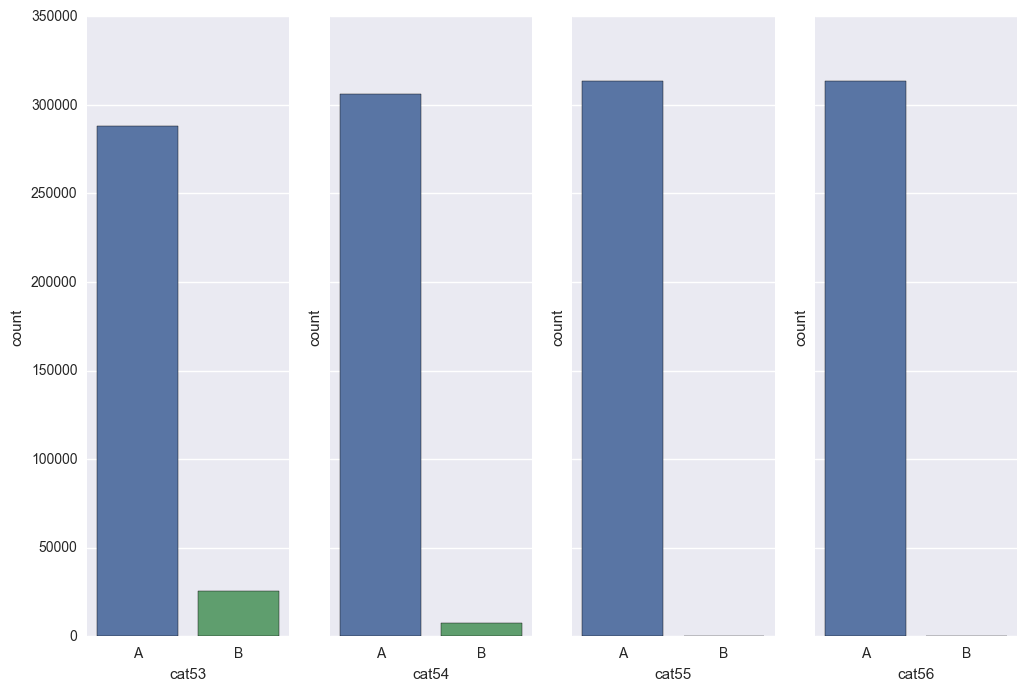

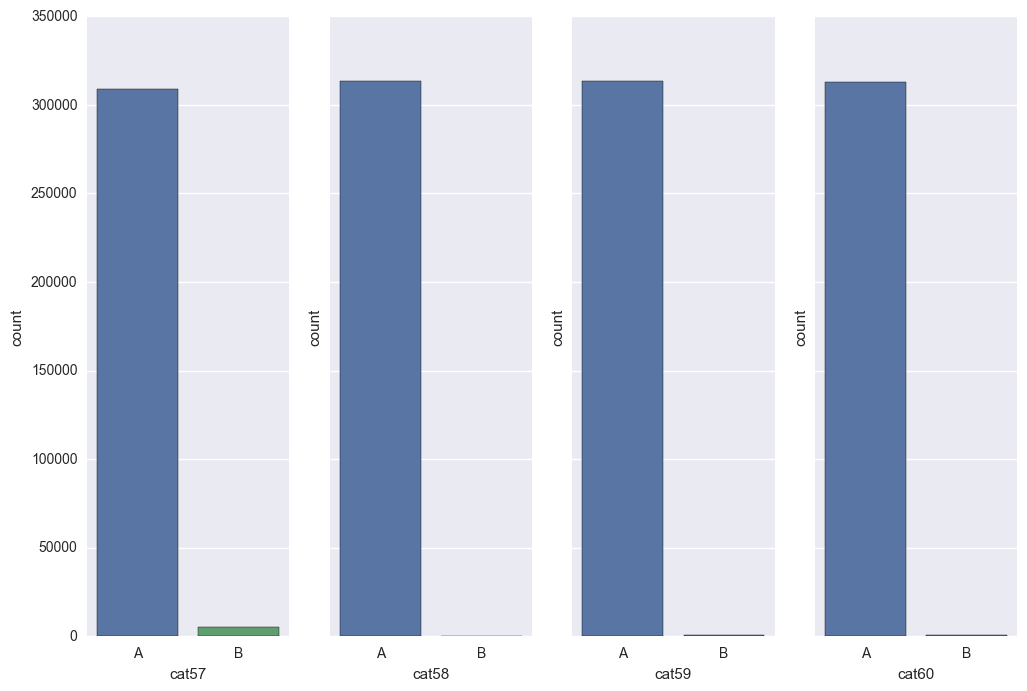

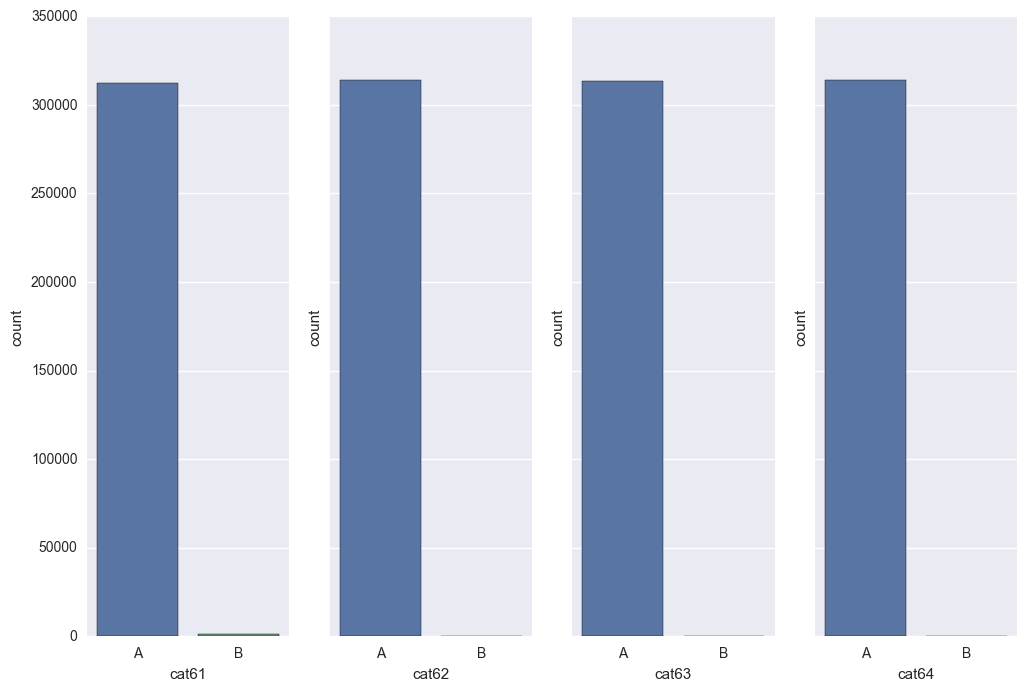

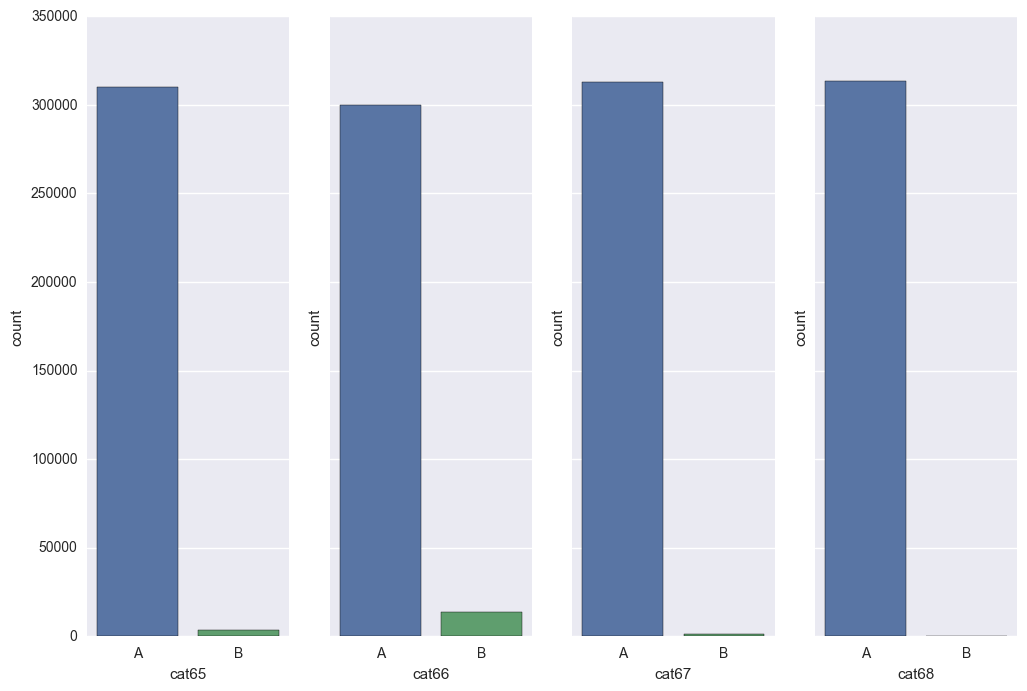

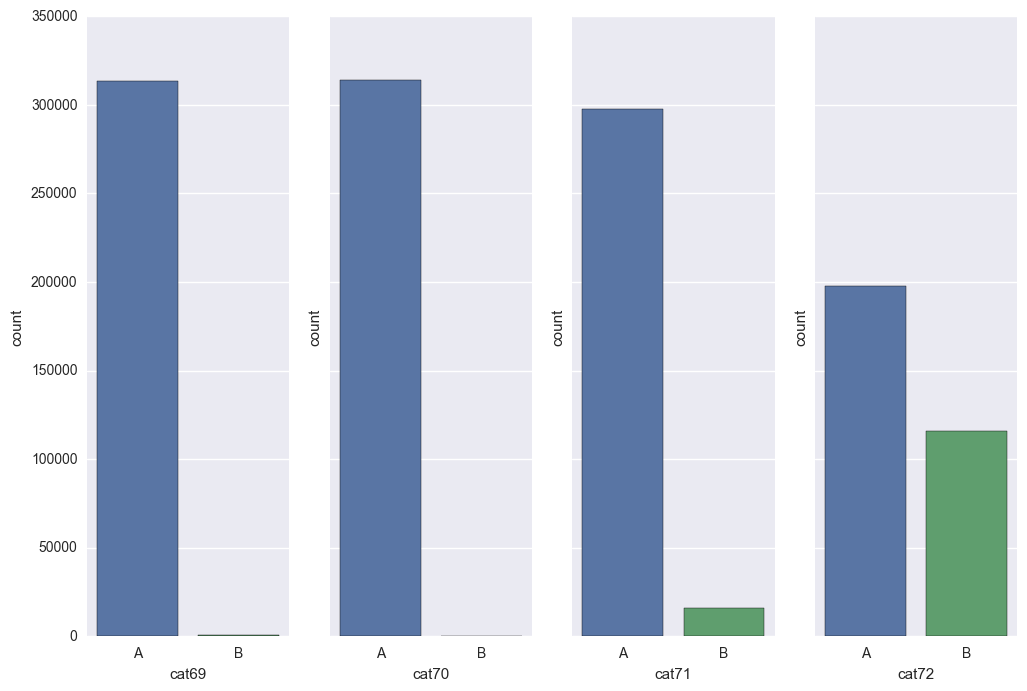

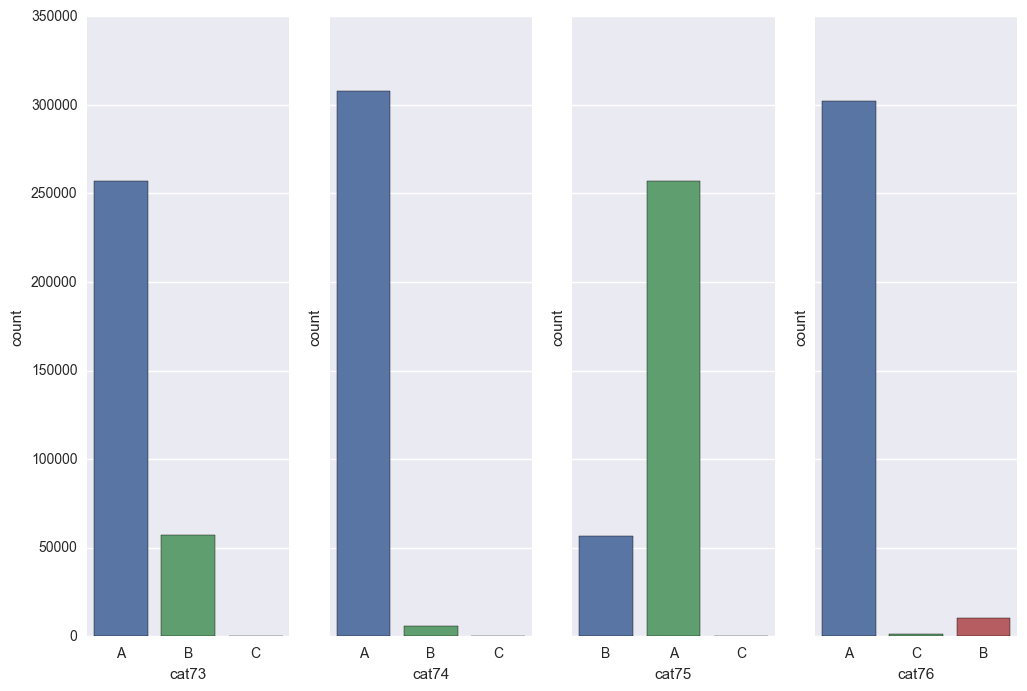

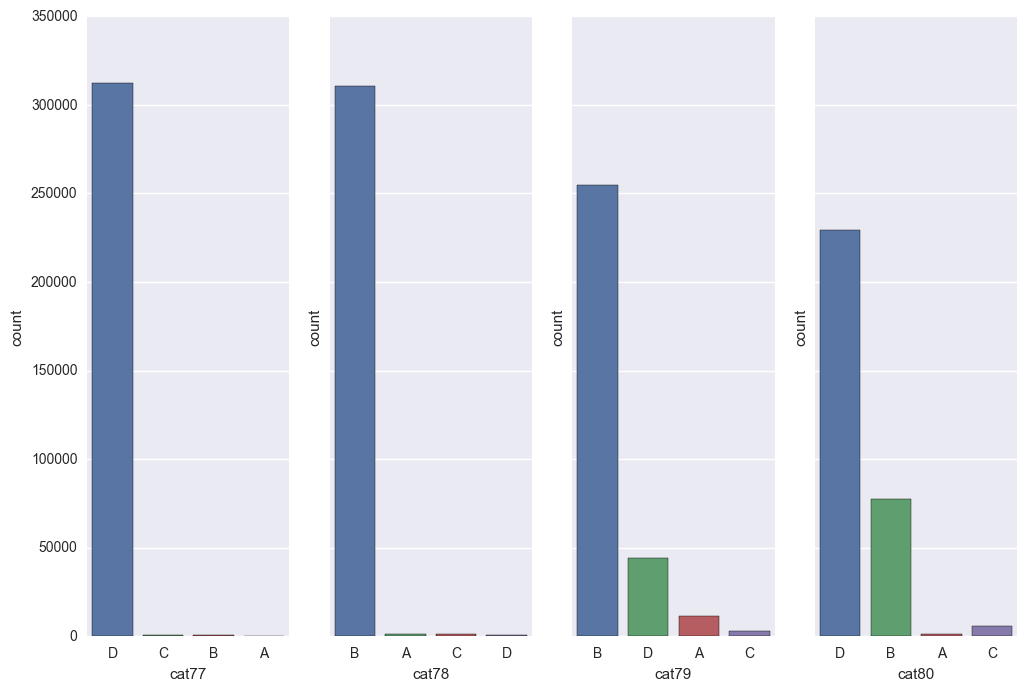

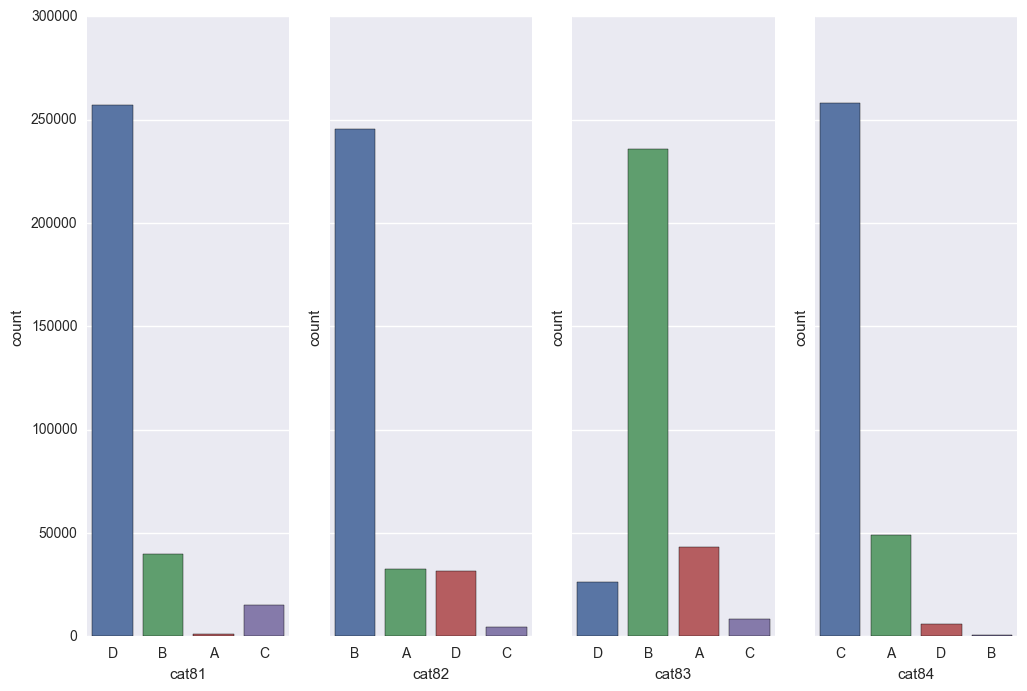

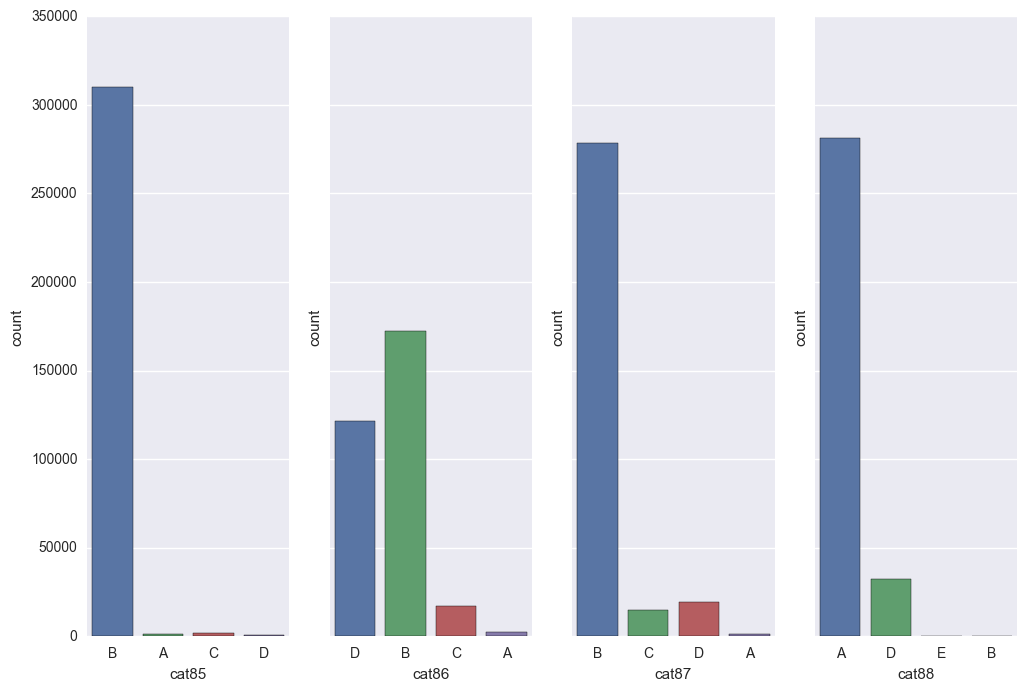

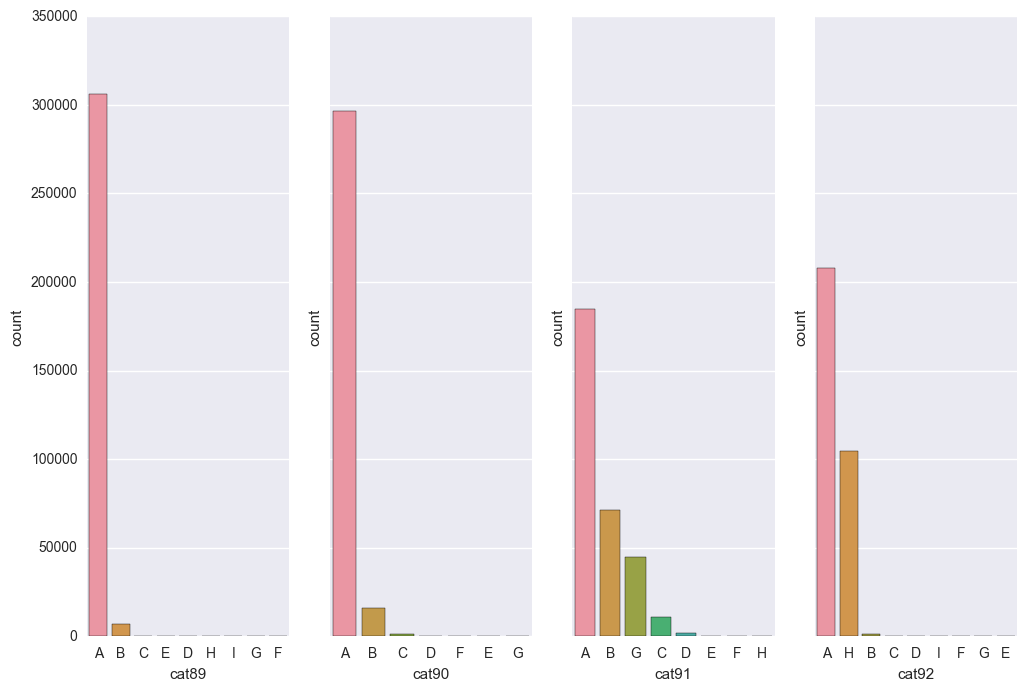

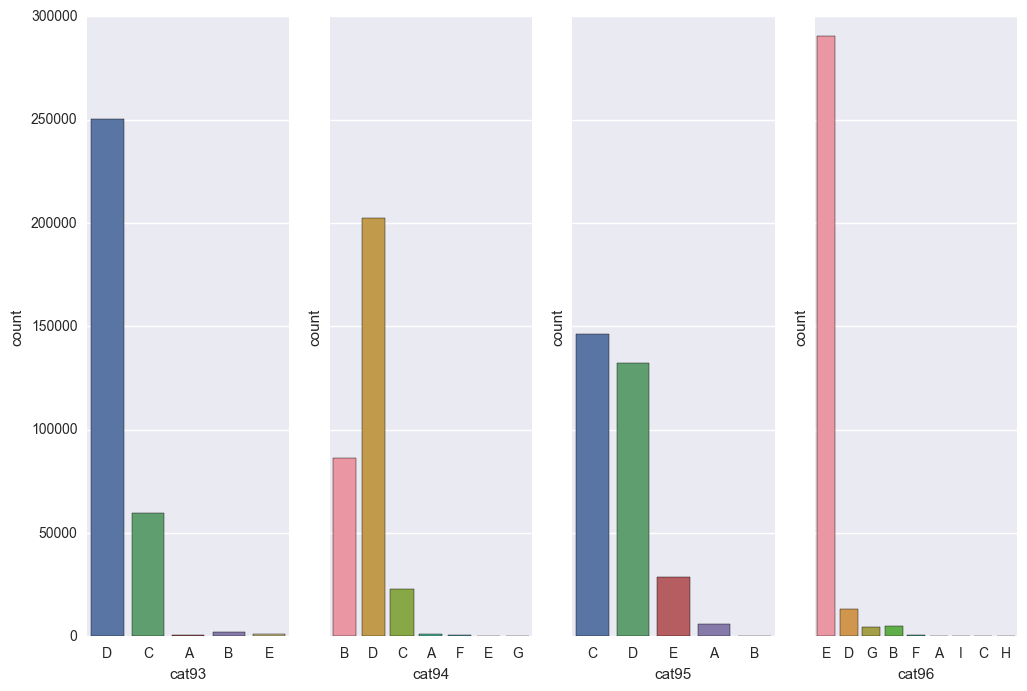

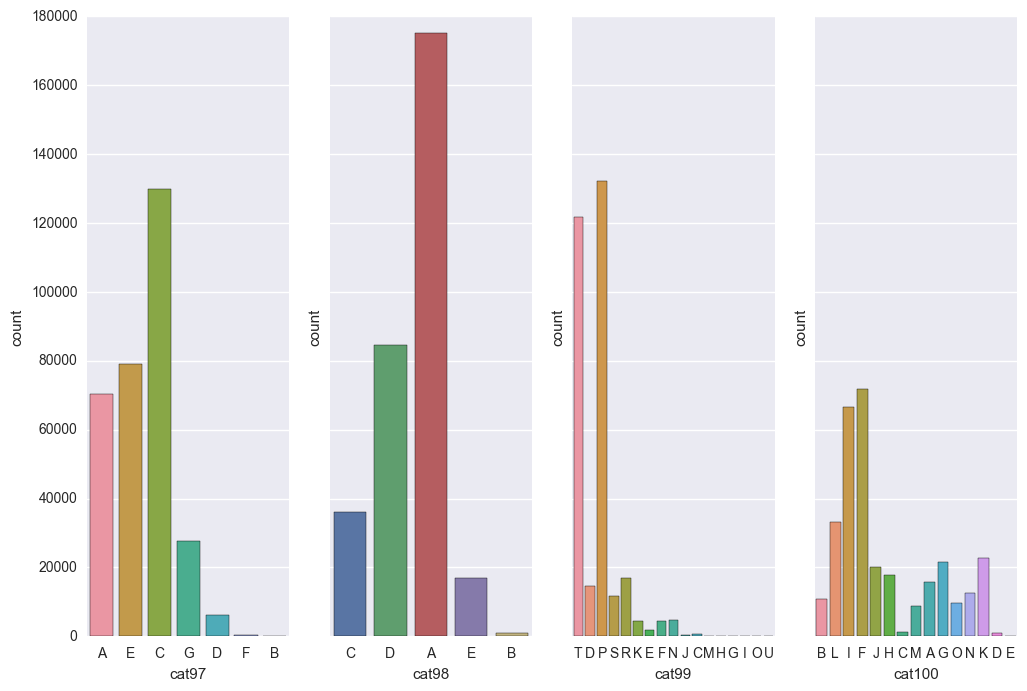

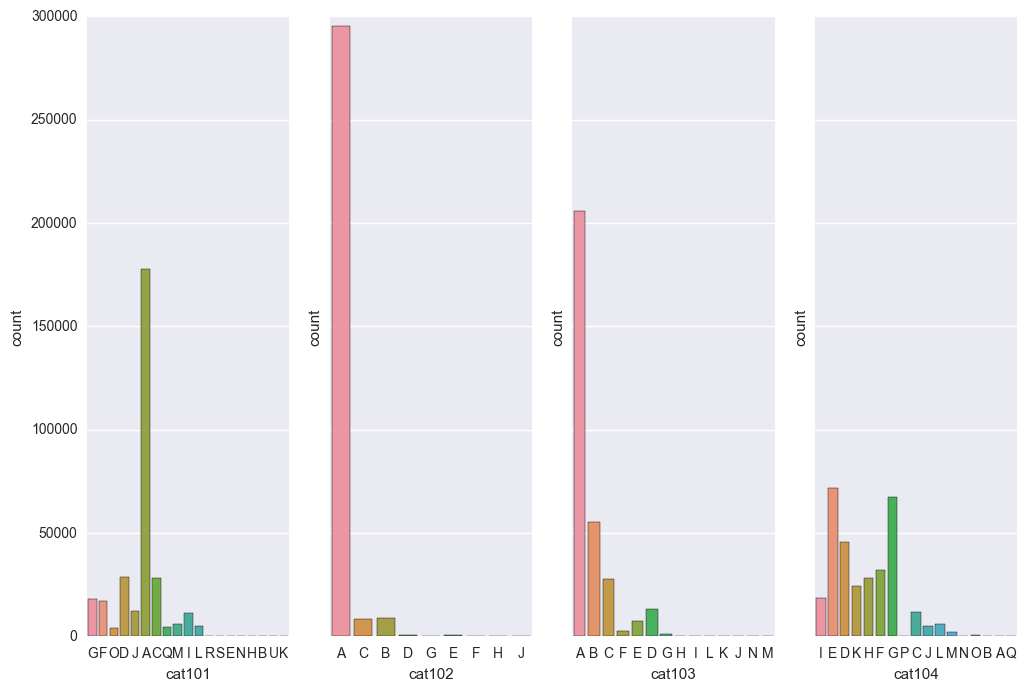

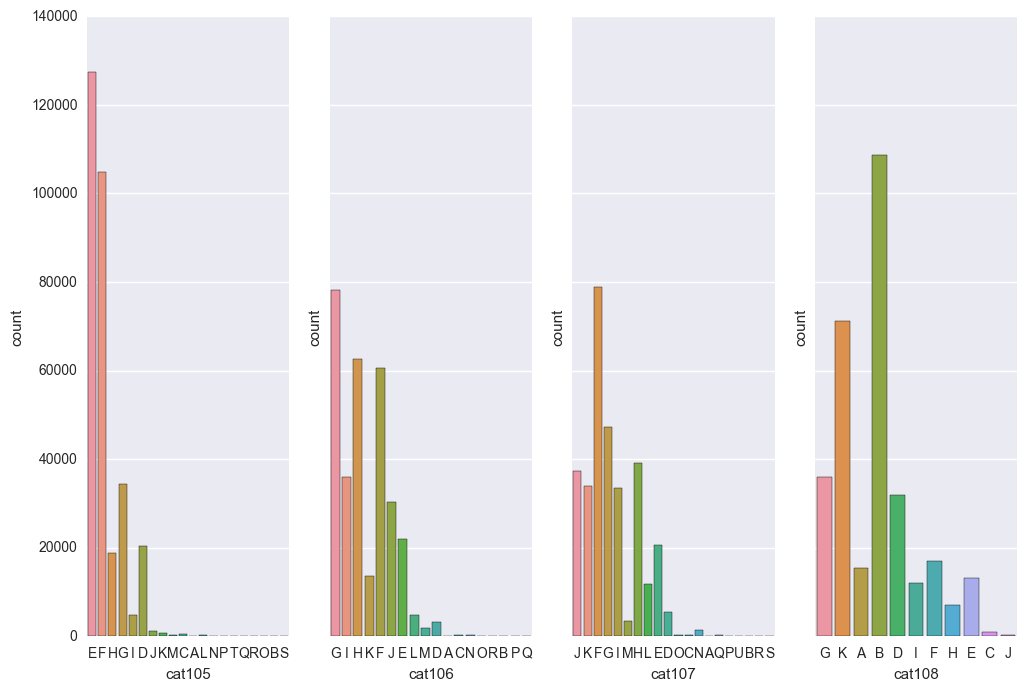

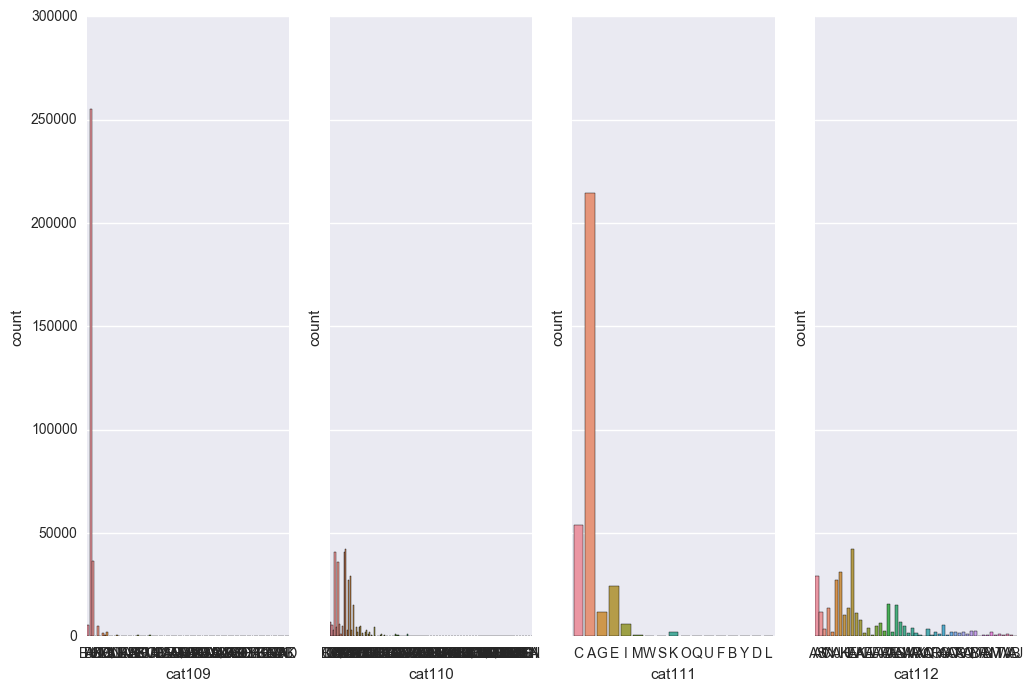

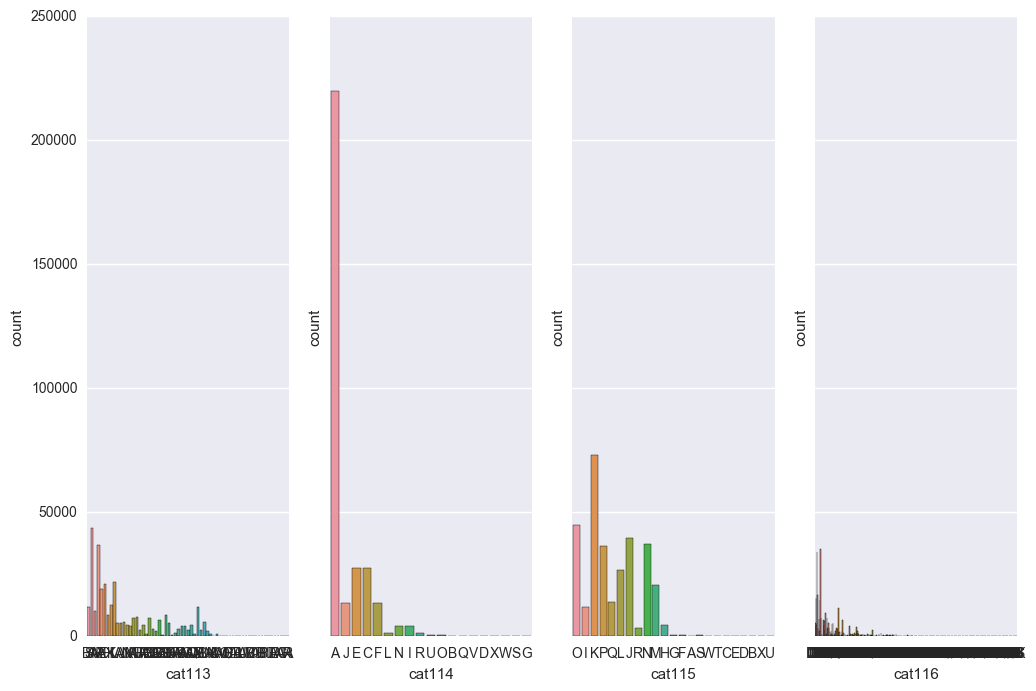

In [10]:
####################################
# Categorical Features Visualization
####################################

data = train_test[categorical_features]
cols = data.columns

# Count plot for all categorical features in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=data, ax=ax[j])

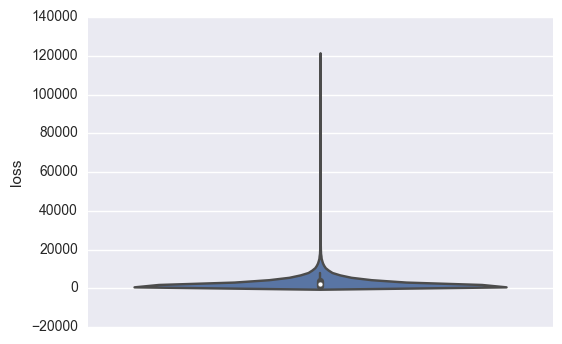

In [11]:
####################################
# Loss Visualization
####################################
sns.violinplot(data=train,y="loss")
plt.show()

In [12]:
####################################
# Transform data
####################################
from scipy.stats import boxcox

def aply_boxcox(df, cols, fact):
    skewed_feats = df[cols].apply(lambda x: skew(x))
    skewed_feats = skewed_feats[abs(skewed_feats) > fact].index
    for feat in skewed_feats:
        df[feat], lam = boxcox(df[feat]+1)

def factorize_features(df, cols):
    for col in cols:
        df[col] = pd.factorize(df[col], sort=True)[0]

start = time()

aply_boxcox(train_test, numeric_features, 0.25)
loss, loss_lam = boxcox(loss)
factorize_features(train_test, categorical_features)
train_rows = train_test.loc[features.index]
test_rows = train_test.loc[test.index]

end = time()
print "Transform data in {:.1f} seconds.".format(end - start)

Transform data in 20.0 seconds.


In [13]:
####################################
# Scale data
####################################
from sklearn.preprocessing import StandardScaler

def scale_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

start = time()

_, scaler = scale_data(train_test)
train, _ = scale_data(train_rows, scaler)
test, _ = scale_data(test_rows, scaler)
y, scaler = scale_data(loss.reshape(-1, 1))

end = time()
print "Scale data in {:.1f} seconds.".format(end - start)

Scale data in 1.8 seconds.


In [14]:
####################################
# Define Grid Search Function
####################################

from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV

def fit_model(X, y, estim, params):
    score = make_scorer(r2_score, greater_is_better=True)
    sss = ShuffleSplit(len(X), n_iter = 10, test_size = 0.20, random_state = 86401)
    grid = GridSearchCV(estimator=estim, param_grid=params, scoring=score, cv=sss, n_jobs=6)
    grid = grid.fit(X, y)
    return grid

In [15]:
####################################
# Fit Bayesian Ridge
####################################

from sklearn.linear_model import BayesianRidge

start = time()

bay = BayesianRidge()
param_bay = {'n_iter':[2, 4, 8]}
bay_grid = fit_model(train, y, bay, param_bay)

end = time()
print "BAY grid search in {:.1f} seconds.".format(end - start)
print "BAY best score:  {:.4f}".format(bay_grid.best_score_)
print bay_grid.best_estimator_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np

BAY grid search in 59.2 seconds.
BAY best score:  0.4766
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=2,
       normalize=False, tol=0.001, verbose=False)


In [17]:
####################################
# Fit GradientBoostingRegressor
####################################
start = time()

gbr = ensemble.GradientBoostingRegressor()
param_gbr = {'n_estimators' : [25], 'max_depth' : [6, 8, 10], 'random_state' : [864]}
gbr_grid = fit_model(train, y, gbr, param_gbr)

end = time()
print "GBR grid search in {:.1f} seconds.".format(end - start)
print "GBR best score:  {:.4f}".format(gbr_grid.best_score_)
print gbr_grid.best_estimator_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np

GBR grid search in 3157.9 seconds.
GBR best score:  0.5188
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=25, presort='auto',
             random_state=864, subsample=1.0, verbose=0, warm_start=False)


In [18]:
####################################
# Fit GradientBoostingRegressor
####################################
start = time()

gbr = ensemble.GradientBoostingRegressor()
param_gbr = {'n_estimators' : [50], 'max_depth' : [9, 10, 12], 'random_state' : [864]}
gbr_grid = fit_model(train, y, gbr, param_gbr)

end = time()
print "GBR grid search in {:.1f} seconds.".format(end - start)
print "GBR best score:  {:.4f}".format(gbr_grid.best_score_)
print gbr_grid.best_estimator_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np

GBR grid search in 11586.8 seconds.
GBR best score:  0.5424
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=864, subsample=1.0, verbose=0, warm_start=False)


In [22]:
####################################
# Fit GradientBoostingRegressor
####################################
start = time()

gbr = ensemble.GradientBoostingRegressor()
param_gbr = {'n_estimators' : [200], 'max_depth' : [10], 'random_state' : [864]}
gbr_grid = fit_model(train, y, gbr, param_gbr)

end = time()
print "GBR grid search in {:.1f} seconds.".format(end - start)
print "GBR best score:  {:.4f}".format(gbr_grid.best_score_)
print gbr_grid.best_estimator_

C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np

GBR grid search in 11756.7 seconds.
GBR best score:  0.5457
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=864, subsample=1.0, verbose=0,
             warm_start=False)


In [23]:
start = time()

y_gbr = gbr_grid.best_estimator_.predict(test)
y_gbr = scaler.inverse_transform(y_gbr)
y_gbr = np.exp(np.log(loss_lam*y_gbr+1)/loss_lam)

end = time()
print "GBR predict in {:.1f} seconds.".format(end - start)

GBR predict in 2.1 seconds.


In [24]:
test_raw = pd.read_csv('Z:/data/allstate/test.csv', index_col='id')

In [25]:
df = pd.DataFrame()
df.insert(0, 'id', list(test_raw.index))
df.insert(1, 'loss', list(y_gbr))
df.to_csv('Z:/data/allstate/submission3.csv',index=False)

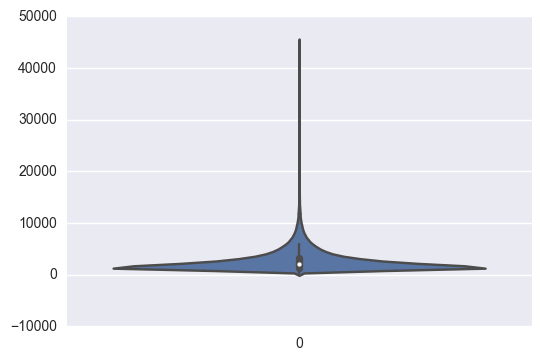

           predicted
count  125546.000000
mean     2646.944917
std      2019.722474
min       248.732359
25%      1368.071047
50%      1994.295228
75%      3188.932779
max     45219.140168


In [59]:
####################################
# Loss Predicted Visualization
####################################
sns.violinplot(data=y_gbr)
plt.show()
print pd.DataFrame({'predicted': y_gbr}).describe()